## Machine learning (<em>Bagging - bootstrap aggregating</em>)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Passo 1: Ler o dataset

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xls')

print("################################ DATASET ################################")
print(df.head())

print("")

print("################################ INFO ################################")
print(df.info())

################################ DATASET ################################
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeF

### Passo 2.1: Pré-processamento dos dados: Avaliar a correlação entre os atributos

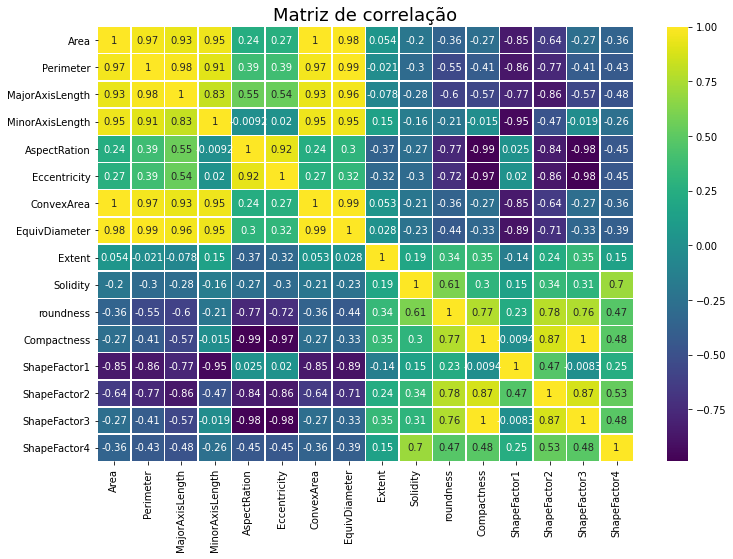

In [3]:
df_atributos = df.drop(columns = ["Class"])

corr = df_atributos.corr()

fig = plt.figure(figsize = (12, 8))

sns.heatmap(data = corr, cmap='viridis', annot=True, linewidths=.5)
plt.title("Matriz de correlação", fontsize = 18)

plt.show()

### Passo 2.2: Pré-processamento dos dados: distribuição dos dados

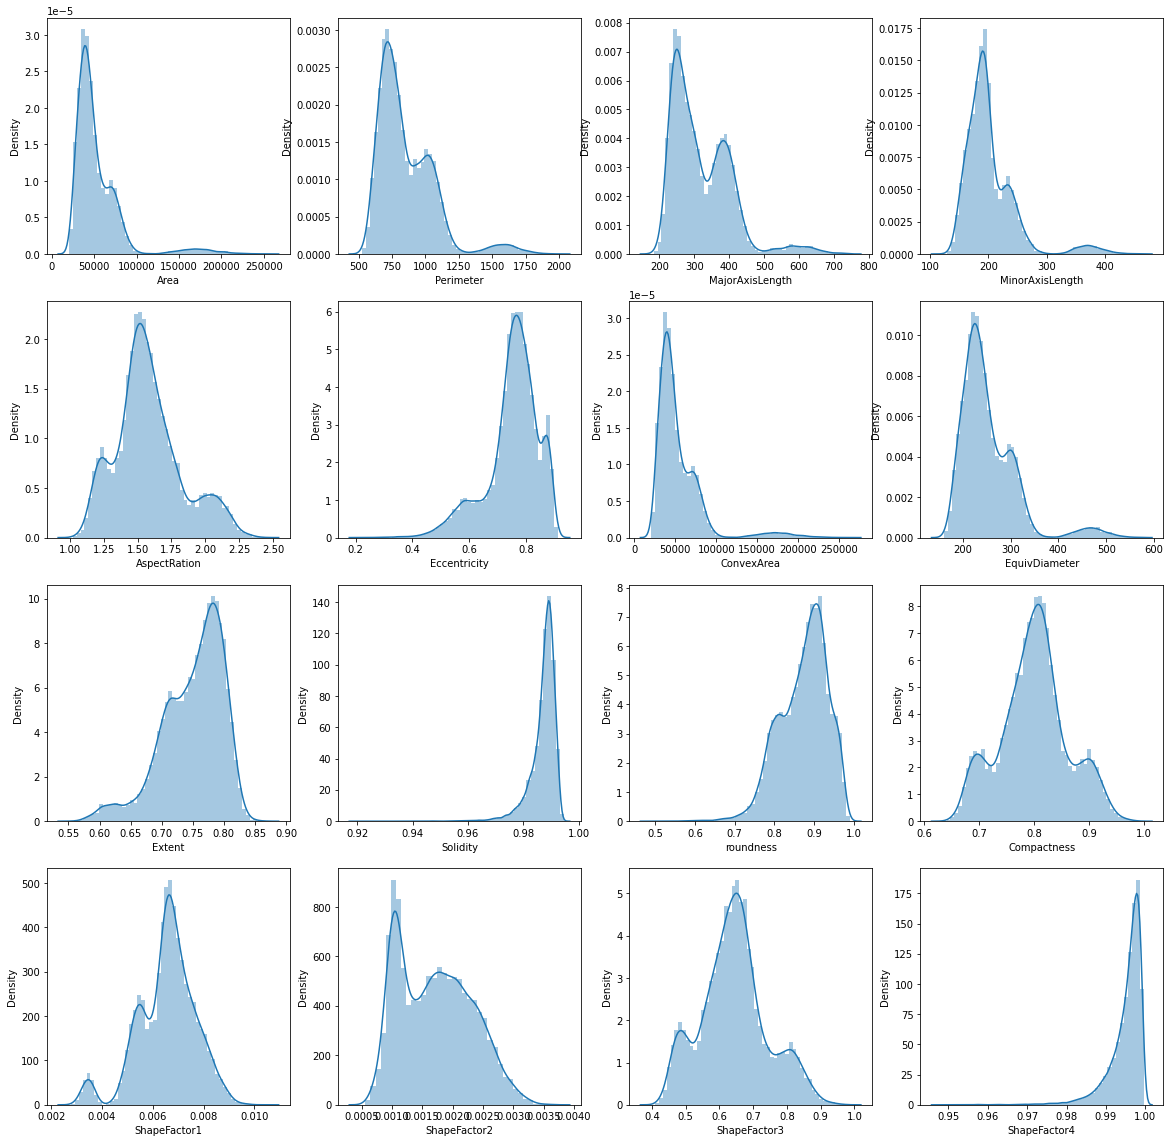

In [4]:
n = 4
m = 4

fig, axe = plt.subplots(n, m, figsize = (20, 20))
columns = df_atributos.columns

for i, ax in enumerate(fig.axes):
    
    sns.distplot( x = df[columns[i]], ax = ax, axlabel= columns[i])

### Passo 2.2: Pré-processamento dos dados: distribuição da Target

Text(0, 0.5, 'Count')

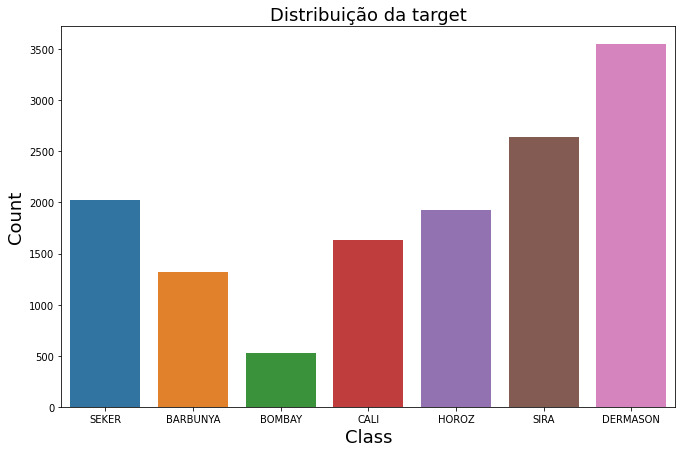

In [5]:
fig = plt.figure(figsize = (11, 7))

sns.countplot(data = df, x = df["Class"])

plt.title("Distribuição da target", fontsize = 18)
plt.xlabel("Class", fontsize = 18)
plt.ylabel("Count", fontsize = 18)

### Passo 2.3: Pré-processamento: Transformando a variável target em dummy

In [6]:
Target = df["Class"].map({"SEKER": 1, "BARBUNYA": 2, "BOMBAY": 3, "CALI": 4, "HOROZ": 5, "SIRA": 6, 
                         "DERMASON": 7})

new_df = df_atributos
new_df["Class"] = Target

print(Target)

0        1
1        1
2        1
3        1
4        1
        ..
13606    7
13607    7
13608    7
13609    7
13610    7
Name: Class, Length: 13611, dtype: int64


### Passo 3: Ajuste do modelo preditivo

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score 

#--------------------Separando dados de treino e teste--------------------------#
X_train, X_test, Y_train, Y_test= train_test_split(df_atributos, Target,
                                                   test_size= 0.3, random_state= 101)


#---------------------------- Bagging Classifier ---------------------------------#
BC = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 300,
                      max_samples= 100, bootstrap= True, n_jobs=-1)

#----------------------- Validação cruzada (treino) ------------------------------#
CV_train = cross_val_score(BC, X_train, Y_train, cv = 5)


#------------------------- Validação cruzada (teste) -----------------------------#
CV_test = cross_val_score(BC, X_test, Y_test, cv = 5)


#----------------------------- Ajuste do modelo ----------------------------------#
modelo = BC.fit(X_train, Y_train)


#-------------------- Predições com dados de treino -----------------------------#
previsoes_train = modelo.predict(X_train)


#-------------------- Predições com dados de teste -----------------------------#
previsoes_test = modelo.predict(X_test)


#---------------------- Acurácia nos dados de treino ----------------------------#
acuracia_train = accuracy_score(Y_train, previsoes_train)


#---------------------- Acurácia nos dados de teste ----------------------------#
acuracia_test = accuracy_score(Y_test, previsoes_test)


#---------------------- Matriz de confusão nos dados de treino ----------------------------#
matriz_train = confusion_matrix(Y_train, previsoes_train)


#---------------------- Matriz de confusão nos dados de teste ----------------------------#
matriz_test = confusion_matrix(Y_test, previsoes_test)



print("Acurácia para os dados de treino: ", acuracia_train)
print("")
print("#--------------------- Matriz de confusão para os dados de treino ------------------------#")
print(matriz_train)
print("")
print("#------------------------ Validação cruzada dados de treino ------------------------------#")
print(CV_train)

print("")
print("")
print("")
print("Acurácia para os dados de teste: ", acuracia_test)
print("")
print("#--------------------- Matriz de confusão para os dados de teste ------------------------#")
print(matriz_test)
print("")
print("#------------------------ Validação cruzada dados de teste ------------------------------#")
print(CV_test)
